In [1]:
# We want pandas and our scaler:

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
# Preset pandas as Df for scaler

from sklearn import set_config
set_config(transform_output="pandas")

In [3]:
# Install scikit newest version

# pip install scikit-learn --upgrade

In [4]:
# Load Csv:

df_5k_songs = pd.read_csv(r'df_audio_features_5000.csv')

In [5]:
#  Strip whitespaces & clean columns

df_5k_songs.columns = df_5k_songs.columns.str.strip()
df_5k_songs_cl = df_5k_songs.drop(['id','html','type', 'time_signature'], axis=1)

df_5k_songs.columns

Index(['name', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'duration_ms', 'time_signature', 'id',
       'html'],
      dtype='object')

In [6]:
# Create title, drop name, artist column

df_5k_songs_cl['title'] = df_5k_songs_cl['artist'] + ' - ' + df_5k_songs_cl['name']
df_5k_songs_cl = df_5k_songs_cl.drop(['name', 'artist'], axis=1)
df_5k_songs_cl.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,title
0,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,256213,Gilberto Gil ...
1,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,191867,Antônio Carlos Jobim ...
2,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,152267,Martinho Da Vila ...
3,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,186227,Chico César ...
4,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,273680,Kurt Elling ...


In [7]:
# Slice only energy & tempo and set title

df_5k_songs_energy_tempo = df_5k_songs_cl.copy()

# Sort by title

df_5k_songs_energy_tempo.sort_values(by='title', ascending=True, inplace=True)

# Set title as index

df_5k_songs_energy_tempo.set_index('title', inplace=True)

In [8]:
df_5k_songs_energy_tempo. head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
title,,,,,,,,,,,,
*NSYNC - Bye Bye Bye,0.571,0.870,8,-3.877,0,0.0641,0.0198,0.000007,0.0564,0.813,172.716,199640
-M- - Solidarité,0.754,0.777,3,-7.702,1,0.1350,0.5010,0.000000,0.1040,0.899,82.414,186600
2CELLOS - Candle in the Wind,0.170,0.104,2,-17.169,1,0.0445,0.9540,0.784000,0.1930,0.079,112.161,165973
2CELLOS - Hurt,0.362,0.208,9,-12.478,0,0.0398,0.9280,0.906000,0.1100,0.299,77.305,269613
2CELLOS - I Don't Care,0.702,0.315,7,-18.711,1,0.1080,0.6950,0.857000,0.1080,0.369,102.033,215467


## Scaling with standartscaler

In [9]:
# StScaler - Create Df
st_scaler = StandardScaler()

# Transformation here
df_5k_songs_energy_tempo_scaled = st_scaler.fit_transform(df_5k_songs_energy_tempo)

df_5k_songs_energy_tempo.sample(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
title,,,,,,,,,,,,
"Richard Wagner - Tannhäuser, WWV 70 - Paris version / Act 3: ""Beglückt darf nun dich, o Heimat"" (Pilgrims Chorus)",0.100,0.142,3,-17.518,1,0.0386,0.989000,0.011800,0.1440,0.0685,79.964,296440
Juelz Santana - There It Go (The Whistle Song),0.942,0.892,6,-6.363,0,0.1960,0.023000,0.000897,0.2640,0.5950,100.007,180493
Equinox - Rites of Red Giving,0.217,0.891,1,-7.258,1,0.1080,0.000005,0.000100,0.0977,0.2390,138.254,374962
Ariana Grande - 7 rings,0.778,0.317,1,-10.732,0,0.3340,0.592000,0.000000,0.0881,0.3270,140.048,178627
Sunnery James & Ryan Marciano - Born Again (Babylonia),0.638,0.791,11,-6.891,0,0.0365,0.131000,0.000197,0.5670,0.4340,126.042,175264
Miley Cyrus - Party In The U.S.A.,0.652,0.698,10,-4.667,0,0.0420,0.001120,0.000115,0.0886,0.4700,96.021,202067
Diddy - I'll Be Missing You (feat. Faith Evans & 112) - 2014 Remaster,0.833,0.619,7,-5.595,1,0.0538,0.111000,0.000021,0.1590,0.9010,109.920,306560
Cheat Codes - Sex,0.604,0.691,0,-5.807,1,0.1590,0.004930,0.000000,0.1250,0.1860,105.014,228360
Nihilist - Abnormally Deceased - Only Shreds Remains Demo '88,0.156,0.880,0,-6.033,1,0.0874,0.000048,0.878000,0.2460,0.3310,106.405,185827


In [10]:
# Display age column of original DataFrame and age column of MinMaStandard scaledxed DataFrame to compare
pd.DataFrame({
    'original': df_5k_songs_energy_tempo.iloc[:,-1], 
    'standard_scale': df_5k_songs_energy_tempo_scaled.iloc[:,-1]
}).sort_values(by='original')

,original,standard_scale
title,,
Invocator - To a Twisted Recess of Mind,32760,-1.586426
Xysma - Pulsating Cerebral Slime,36387,-1.559682
Autopsy - Bonesaw,46000,-1.488800
Juniore - Mon autre,48982,-1.466812
Broken Hope - Swallowed Whole,51267,-1.449964
...,...,...
"Richard Strauss - Tod und Verklärung Op.24, TrV 158",1615000,10.080284
Laraaji - Essence,1793760,11.398378
Polish National Radio Symphony Orchestra - Symphony No. 3,1893667,12.135046


In [11]:
# 

pd.DataFrame({
    'original': df_5k_songs_energy_tempo.iloc[:,-2], 
    'standard_scale': df_5k_songs_energy_tempo_scaled.iloc[:,-2]
}).sort_values(by='original')

,original,standard_scale
title,,
Taylor Swift - Shake It Off,0.000,-4.156077
"Johann Sebastian Bach - French Suite No. 5 in G Major, BWV 816: I. Allemande",34.856,-2.935874
Morpheus Descends - Immortal Coil,42.817,-2.657184
Hauschka - Sunset Monet,49.654,-2.417841
Oscar Peterson Trio - I Got It Bad And That Ain't Good,49.689,-2.416616
...,...,...
Little Richard - Ready Teddy,205.973,3.054414
Otis Redding - (Sittin' On) the Dock of the Bay,205.981,3.054695
Duane Eddy - Rebel Rouser,206.313,3.066317


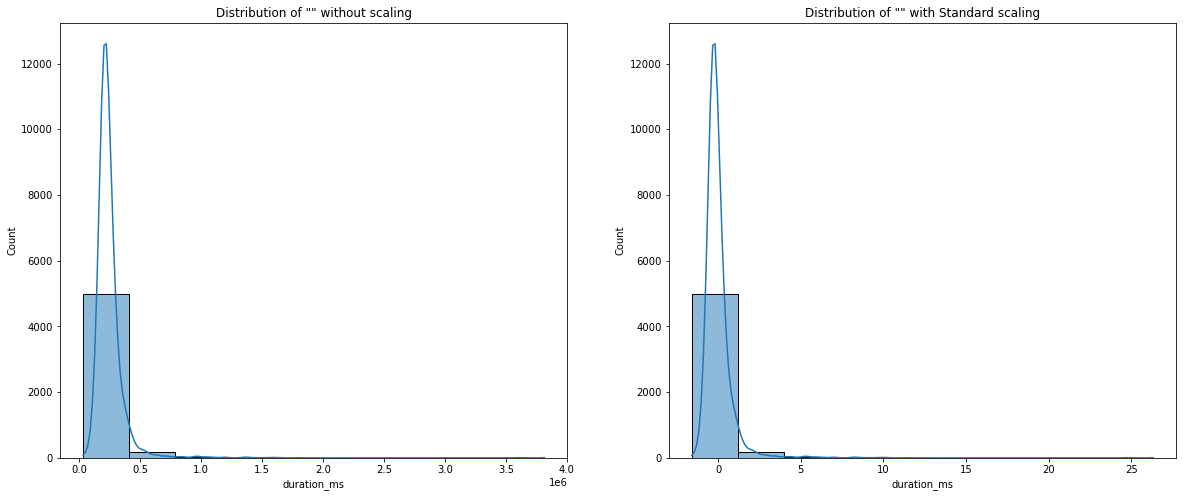

In [12]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(data=df_5k_songs_energy_tempo.iloc[:,-1], bins=10, kde=True, ax=ax1);
sns.histplot(df_5k_songs_energy_tempo_scaled.iloc[:,-1], bins=10, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('Distribution of "" without scaling')
ax2.set_title('Distribution of "" with Standard scaling')

plt.show()

In [13]:
# # Making the DataFrame for the Standard heatmap
# df_5k_songs_energy_tempo_standard_distances = pd.DataFrame(pairwise_distances(df_5k_songs_energy_tempo_scaled), index=df_5k_songs_energy_tempo.index, columns=df_5k_songs_energy_tempo.index)

# # Stating that we want two plots
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# # Plotting the two plots
# sns.heatmap(df_5k_songs_energy_tempo, ax=ax1, linewidths=.2);
# sns.heatmap(df_5k_songs_energy_tempo_standard_distances, ax=ax2, linewidths=.2);

# # Adding titles to the plots
# ax1.set_title('Everything NOT in the same 1-10 scaling')
# ax2.set_title('Everything Standard scaled')

# plt.show()

## KMeans

In [14]:
# Applying Kmeans, chose quantity of cluster

df_5k_songs_energy_tempo_cluster_model = KMeans(n_clusters=6)

# Feed data & transform(?)

df_5k_songs_energy_tempo_cluster_model.fit(df_5k_songs_energy_tempo_scaled)
df_5k_songs_energy_tempo_cluster_model

Z:\Progs\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

my_model = df_5k_songs_energy_tempo_cluster_model

In [15]:
# Clustercenterposition

df_5k_songs_energy_tempo_cluster_model.cluster_centers_

array([[ 6.66754526e-01,  1.68841108e-01,  1.97195495e-01,
         4.30834220e-01, -1.35154499e+00, -2.55153072e-01,
        -2.40273933e-01, -5.37181384e-01, -1.94294243e-01,
         4.51956123e-01,  6.37957680e-02, -1.31687328e-01],
       [ 7.85307877e-01,  2.70494592e-01, -3.14820959e-02,
         5.16454012e-01, -8.92563833e-02,  2.79746320e+00,
        -3.19598497e-01, -6.45384488e-01, -7.41446435e-02,
         4.95857072e-01,  1.72843357e-01, -1.48442280e-01],
       [-7.74501019e-01, -1.79681642e+00, -6.23147124e-02,
        -1.82317740e+00, -1.73284740e-03, -5.35622671e-01,
         1.77520068e+00,  1.02449156e+00, -3.23385040e-01,
        -9.24530853e-01, -4.77149895e-01,  5.16672907e-01],
       [ 5.46357974e-01,  5.54128022e-02, -1.20593556e-01,
         3.14381042e-01,  7.39893977e-01, -3.95783837e-01,
        -8.78711289e-02, -5.77624198e-01, -2.19391348e-01,
         6.15638342e-01,  8.44116958e-02, -1.99155917e-01],
       [ 1.96604115e-01,  3.15500823e-01,  1.6935902

In [16]:
# Create DataFrame of Standard scaled values

df_5k_songs_energy_tempo_cluster_position = pd.DataFrame(df_5k_songs_energy_tempo_cluster_model.cluster_centers_)
# Rename cause of length
df_5k_song_e_t_cl_pos = df_5k_songs_energy_tempo_cluster_position

df_5k_song_e_t_cl_pos.columns = df_5k_songs_energy_tempo.columns
df_5k_song_e_t_cl_pos

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.666755,0.168841,0.197195,0.430834,-1.351545,-0.255153,-0.240274,-0.537181,-0.194294,0.451956,0.063796,-0.131687
1,0.785308,0.270495,-0.031482,0.516454,-0.089256,2.797463,-0.319598,-0.645384,-0.074145,0.495857,0.172843,-0.148442
2,-0.774501,-1.796816,-0.062315,-1.823177,-0.001733,-0.535623,1.775201,1.024492,-0.323385,-0.924531,-0.477150,0.516673
3,0.546358,0.055413,-0.120594,0.314381,0.739894,-0.395784,-0.087871,-0.577624,-0.219391,0.615638,0.084412,-0.199156
4,0.196604,0.315501,0.169359,0.333775,-0.034713,0.055357,-0.180030,-0.399262,3.039224,0.172134,0.130191,-0.047217
5,-1.102376,0.896633,0.019159,0.233462,0.124872,0.341795,-0.789449,0.864579,0.024459,-0.819810,0.079157,0.092369


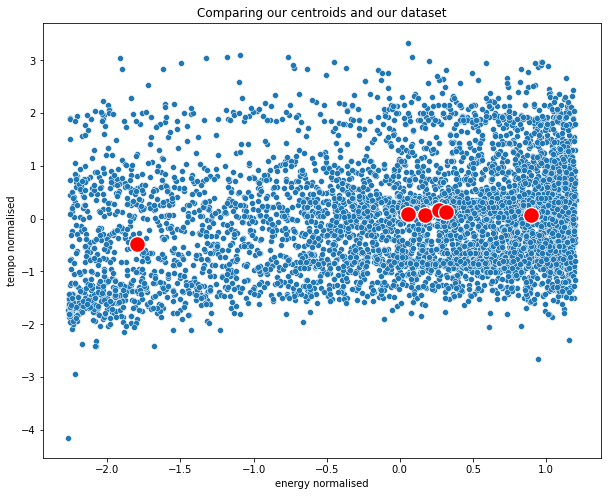

In [17]:
#Comparing our centroids and our dataset

fig, ax = plt.subplots(figsize=(10, 8))
plot_data = pd.DataFrame(df_5k_songs_energy_tempo_scaled)
plot_data.columns = df_5k_songs_energy_tempo.columns

plt.title('Comparing our centroids and our dataset')
plt.xlabel('energy normalised')
plt.ylabel('tempo normalised')
sns.scatterplot(data=plot_data, x='energy', y='tempo')
sns.scatterplot(data=df_5k_song_e_t_cl_pos, x='energy', y='tempo', color='red', s=250)
plt.show()

In [18]:
df_5k_songs_energy_tempo_cluster_model.labels_

array([0, 3, 2, ..., 3, 3, 3])

In [19]:
# Putting the array into a list of names and add into column

df_5k_songs_energy_tempo_scaled['cluster'] = df_5k_songs_energy_tempo_cluster_model.labels_
df_5k_songs_energy_tempo.sample(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
title,,,,,,,,,,,,
Estelle - American Boy,0.727,0.729,0,-2.990,1,0.3260,0.17100,0.000000,0.070,0.512,117.932,284733
Baby Rasta & Gringo - El Carnaval,0.802,0.625,11,-8.589,0,0.0567,0.00297,0.001560,0.175,0.676,94.995,223240
"Billy Ocean - Get Outta My Dreams, Get Into My Car",0.666,0.910,4,-6.457,1,0.0399,0.08740,0.000008,0.336,0.919,117.140,284373
The Mamas & The Papas - California Dreamin' - Single Version,0.557,0.698,1,-7.471,0,0.0390,0.47200,0.000000,0.057,0.677,112.479,158720
Meat Loaf - I'd Do Anything For Love (But I Won't Do That) - Single Edit,0.419,0.672,2,-6.353,1,0.0920,0.62300,0.000000,0.412,0.304,105.212,316467


In [20]:
# Mean of data

clustered_centroids_st = df_5k_songs_energy_tempo_scaled.groupby('cluster').mean()
clustered_centroids_st

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
cluster,,,,,,,,,,,,
0,0.666755,0.168841,0.197195,0.430834,-1.351545,-0.255153,-0.240274,-0.537181,-0.194294,0.451956,0.063796,-0.131687
1,0.785308,0.270495,-0.031482,0.516454,-0.089256,2.797463,-0.319598,-0.645384,-0.074145,0.495857,0.172843,-0.148442
2,-0.774501,-1.796816,-0.062315,-1.823177,-0.001733,-0.535623,1.775201,1.024492,-0.323385,-0.924531,-0.477150,0.516673
3,0.546358,0.055413,-0.120594,0.314381,0.739894,-0.395784,-0.087871,-0.577624,-0.219391,0.615638,0.084412,-0.199156
4,0.196604,0.315501,0.169359,0.333775,-0.034713,0.055357,-0.180030,-0.399262,3.039224,0.172134,0.130191,-0.047217
5,-1.102376,0.896633,0.019159,0.233462,0.124872,0.341795,-0.789449,0.864579,0.024459,-0.819810,0.079157,0.092369


<AxesSubplot:>

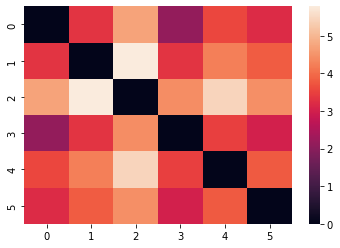

In [21]:
distances_centroids = pairwise_distances(df_5k_songs_energy_tempo_cluster_model.cluster_centers_)
sns.heatmap(distances_centroids)

In [22]:
# Calculating inertia

max_clusters = 15

inertia_list_st = []

for i in range(1,max_clusters):
  model_loop = KMeans(n_clusters=i,n_init=10,random_state=123)
  model_loop.fit(df_5k_songs_energy_tempo_scaled) 
  inertia_list_st.append(round(model_loop.inertia_,3))

print(inertia_list_st)

[78075.777, 62656.128, 49512.109, 40725.231, 37668.425, 34961.688, 32692.384, 31267.494, 30122.745, 29191.943, 28356.095, 27594.392, 27079.907, 26589.293]


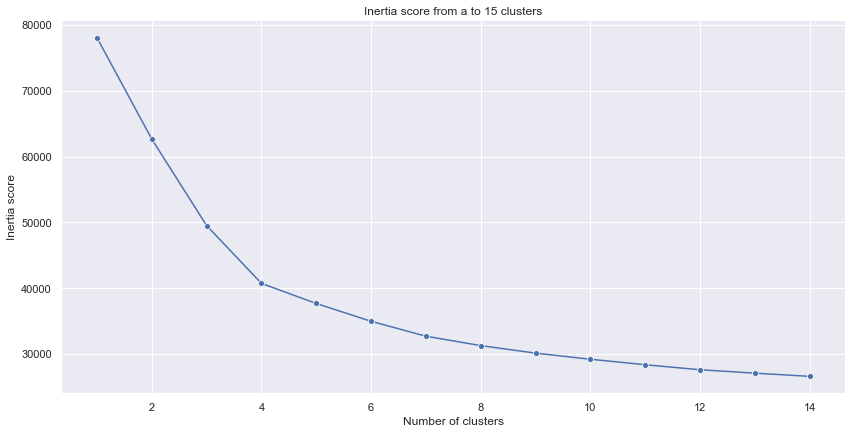

In [23]:
#Elbowmethod

sns.set_theme(style='darkgrid')
(sns.relplot(kind='line',x=range(1,max_clusters),y=inertia_list_st,marker='o',height=6,aspect=2)
    .set(title=f"Inertia score from a to {max_clusters} clusters")
    .set_axis_labels("Number of clusters", "Inertia score")
);

In [24]:
silhouette_score(df_5k_songs_energy_tempo_scaled,df_5k_songs_energy_tempo_cluster_model.labels_)

0.29222712125899836

In [25]:
# Silhouette score
max_clusters = 14

silhouette_list = []

for i in range(2,max_clusters):
  model_loop = KMeans(n_clusters=i,n_init=10,random_state=123)
  model_loop.fit(df_5k_songs_energy_tempo_scaled)
  score = silhouette_score(df_5k_songs_energy_tempo_scaled,model_loop.labels_)
  silhouette_list.append(round(score,2))

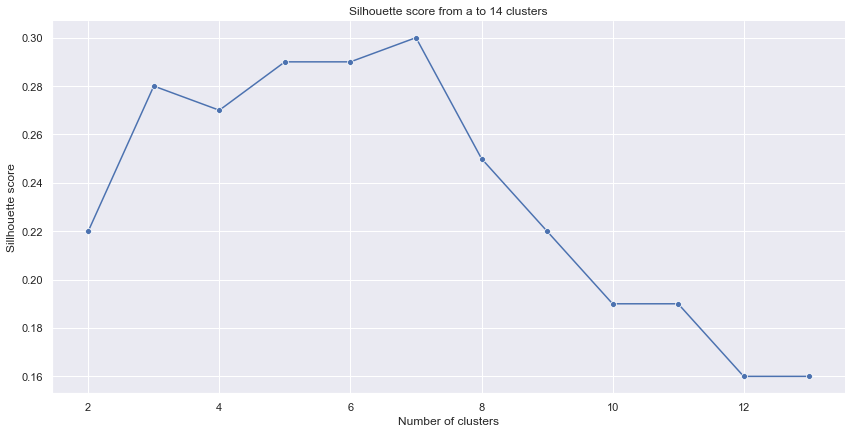

In [26]:
# Elbowmethod #2

sns.set_theme(style='darkgrid')
(sns.relplot(kind='line',x=range(2,max_clusters),y=silhouette_list,marker='o',height=6,aspect=2)
    .set(title=f"Silhouette score from a to {max_clusters} clusters")
    .set_axis_labels("Number of clusters", "Sillhouette score")
);

* For k = 2 the average to silhouette is: 0.2233
	- For cluster = 0 the silhouette value is: 0.29
	- For cluster = 1 the silhouette value is: 0.13
* For k = 3 the average to silhouette is: 0.276
	- For cluster = 0 the silhouette value is: 0.32
	- For cluster = 1 the silhouette value is: 0.25
	- For cluster = 2 the silhouette value is: 0.29
* For k = 4 the average to silhouette is: 0.2719
	- For cluster = 0 the silhouette value is: 0.28
	- For cluster = 1 the silhouette value is: 0.25
	- For cluster = 2 the silhouette value is: 0.29
	- For cluster = 3 the silhouette value is: 0.27
* For k = 5 the average to silhouette is: 0.2858
	- For cluster = 0 the silhouette value is: 0.28
	- For cluster = 1 the silhouette value is: 0.26
	- For cluster = 2 the silhouette value is: 0.36
	- For cluster = 3 the silhouette value is: 0.28
	- For cluster = 4 the silhouette value is: 0.18
* For k = 6 the average to silhouette is: 0.2922
	- For cluster = 0 the silhouette value is: 0.18
	- For cluster = 1 th

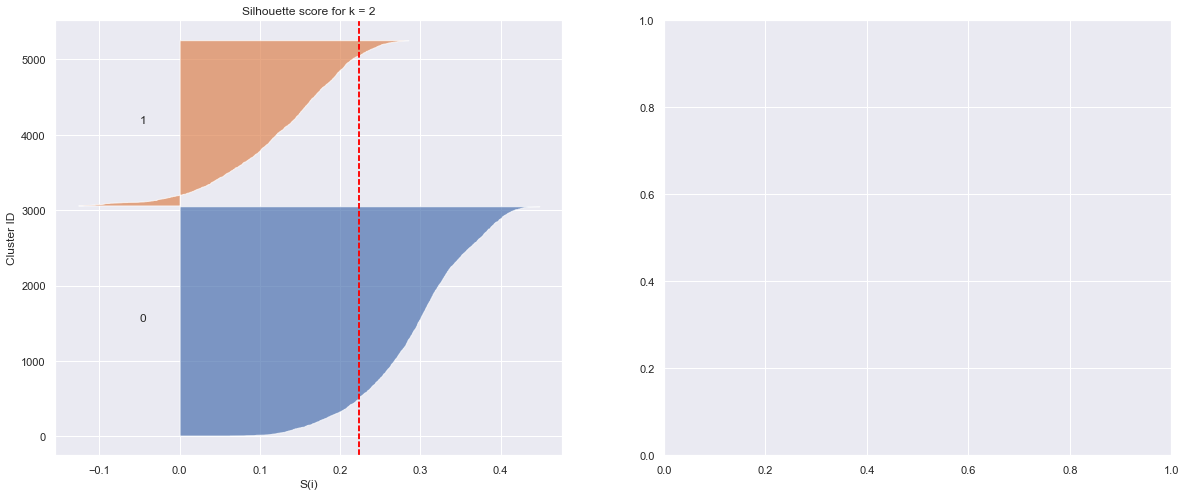

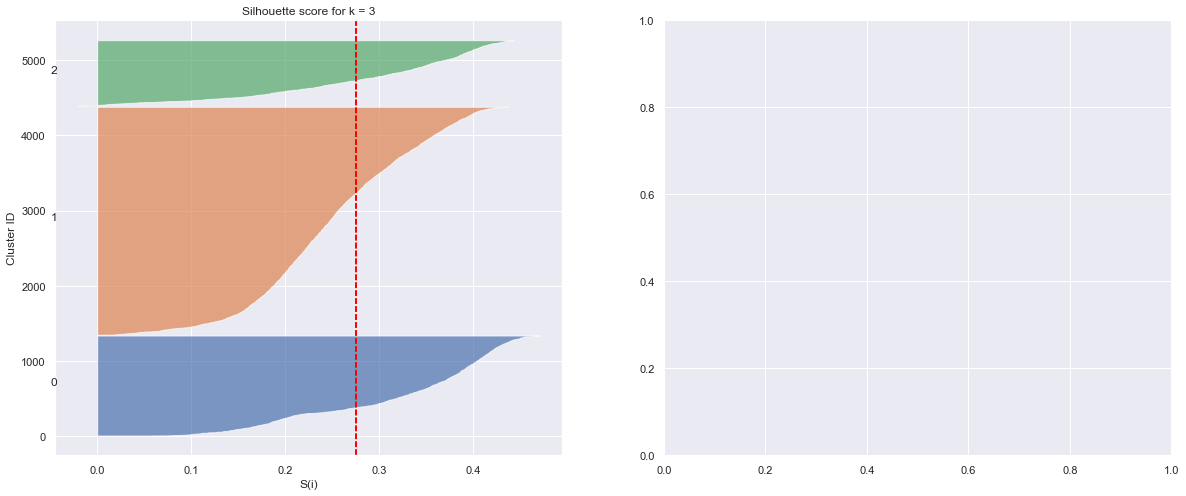

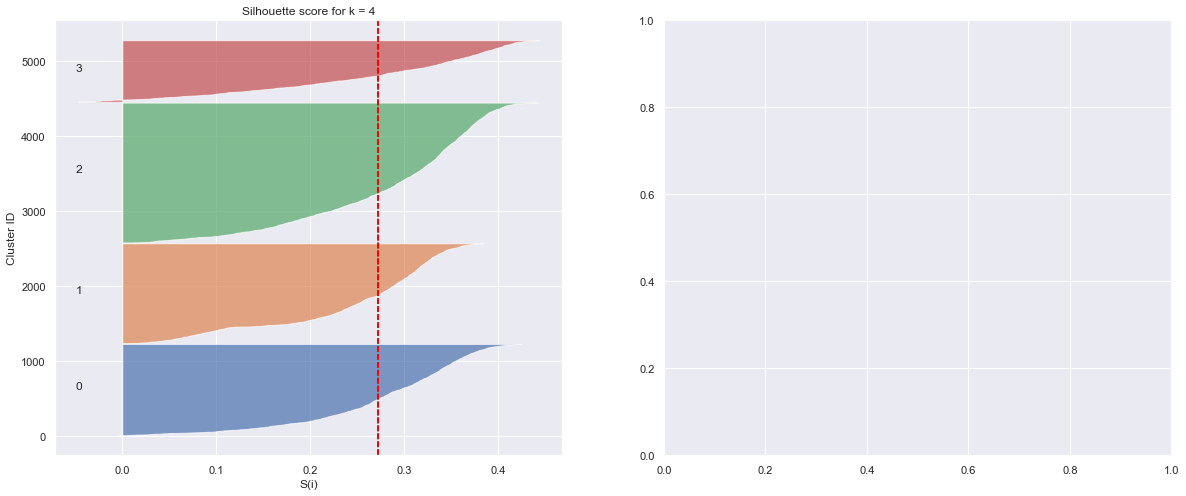

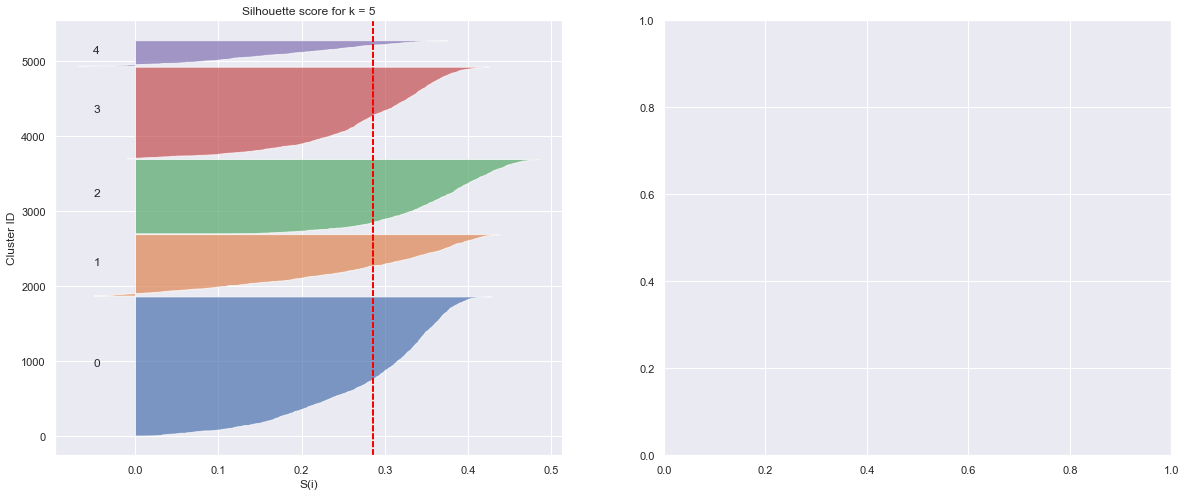

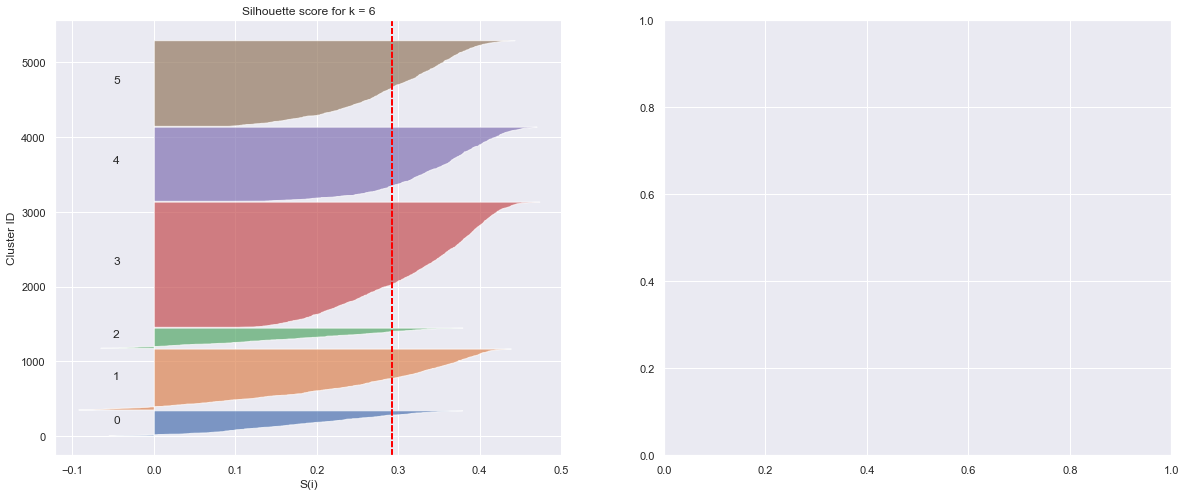

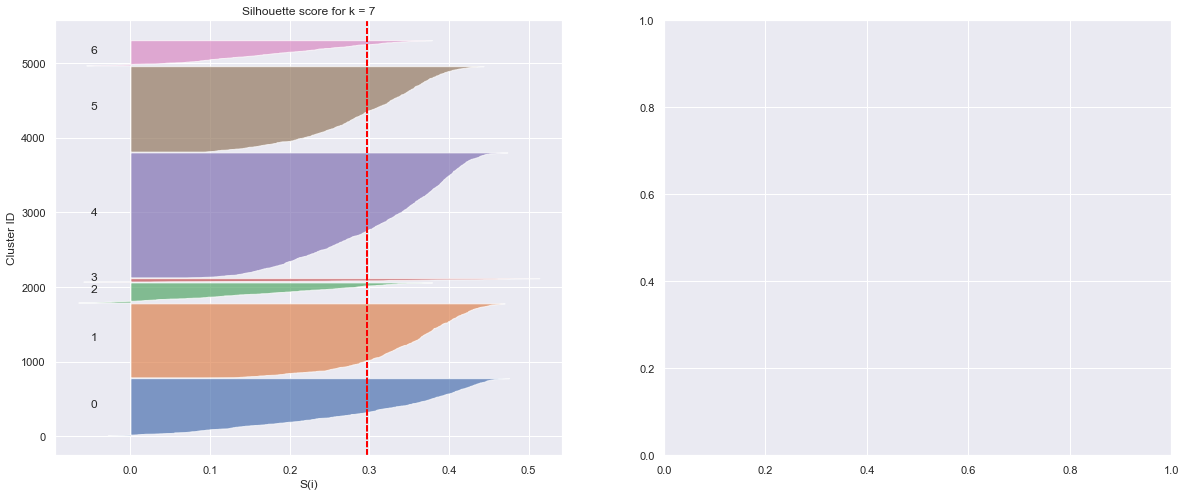

In [27]:
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

max_k = 8
data = df_5k_songs_energy_tempo_scaled

for k in range(2, max_k): 
    kmean_model = KMeans(n_clusters=k,n_init=10,random_state=123).fit(data)
    labels = kmean_model.labels_
    
    if 1 < k < data.shape[0]: 
        
        fig, (axis1, axis2) = plt.subplots(1, 2)
        fig.set_size_inches(20, 8)
        
        sil_avg = silhouette_score(data, labels)
        print(f"* For k = {k} the average to silhouette is: {round(sil_avg,4)}")
        sample_sil_val = silhouette_samples(data, labels)
        
        y_lower = 10
        
        for i in range(k): 
            ith_cluster_sv = sample_sil_val[labels == i]
            print(f"\t- For cluster = {i} the silhouette value is: {round(np.mean(ith_cluster_sv),2)}")
            
            ith_cluster_sv.sort()
            
            # Calculate where to put the silhuette on the y axes
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
 
            silhouette_avg = silhouette_score(df_5k_songs_energy_tempo_scaled, labels)
            axis1.axvline(x=silhouette_avg, color="red", linestyle="--")
            # Paint the cluster
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv, 
                                alpha = 0.7)
            
            
            # Label the cluster
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i))
            
            # Calculate the next y lower value for the next cluster of the graph
            y_lower = y_upper + 10 # we left 10 spaces without any observation
            
        axis1.set_title("Silhouette score for k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("Cluster ID")
plt.show()